# K Means Clustering

This notebook covers $k$-means clustering. Since this is a clustering algorithm, it seeks to find groups, and does so by:

1. picking $k$ centroids from the data

2. assigning each point to the nearest centroid (which in this implementation is measured with Euclidean distance)

3. assigning a new centroid to the average, for each group

We will measure this models performance / pick $k$ according to the following formula:

$C = \frac{1}{|S|} \cdot \sum_{x \in S} dist(x,c)$

This prioritizes large $k$ without $k$ being too large.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set_theme()

penguins = pd.read_csv("Datasets/palmer_penguins.csv")

X = penguins[["bill_length_mm", "flipper_length_mm"]].to_numpy()

def make_labels(y):
    if y == "Adelie":
        return 0
    if y == "Chinstrap":
        return 1
    else:
        return 2

# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

In [2]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "magenta"
    elif y == 2:
        return "lightseagreen"
    else:
        return "blue"

c = [colors(label) for label in y]

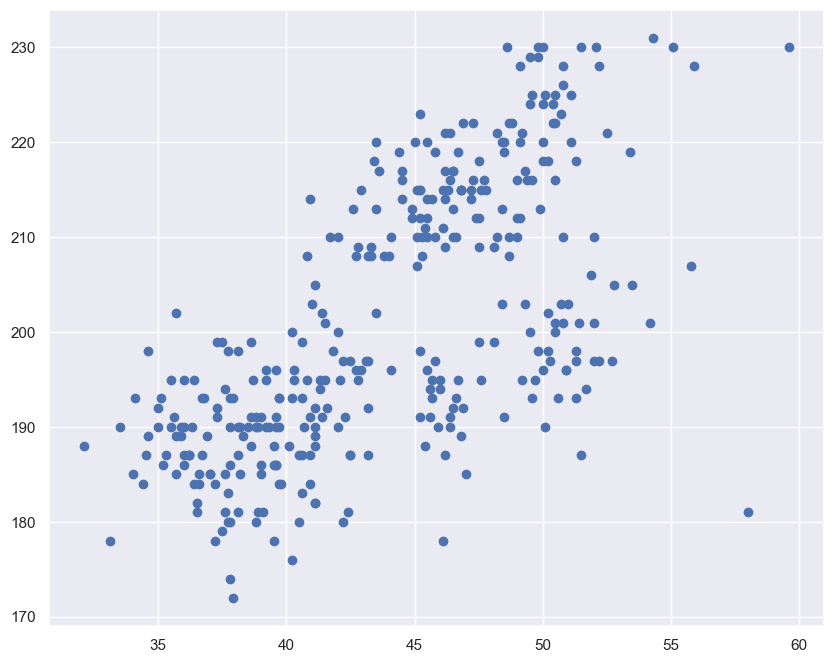

In [3]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
K = 3
centroids = []
for k in range(K):
    i = np.random.randint(0, 342)
    point = (X[i, 0], X[i, 1], k)
    centroids.append(point)

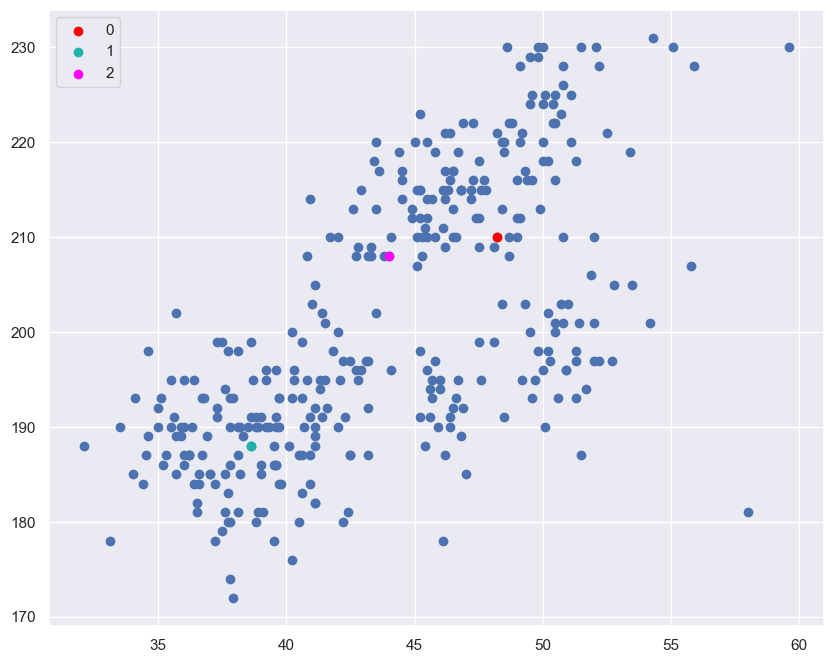

In [5]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][2])
plt.scatter([centroids[1][0]], [centroids[1][1]], color = "lightseagreen", label = centroids[1][2])
plt.scatter([centroids[2][0]], [centroids[2][1]], color = "magenta", label = centroids[2][2])
plt.legend()
plt.show()

In [6]:
def distance(i, X, centroid):
    return np.sqrt(sum((X[i, j] - centroid[j])**2 for j in range(2)))

In [7]:
def assign_label(i, X, centroids):
    distances = np.array([distance(i, X, centroid) for centroid in centroids])
    label = np.argmin(distances)
    return label 

In [8]:
def assign_clusters(X, centroids):
    return [assign_label(i, X, centroids) for i in range(len(X))]

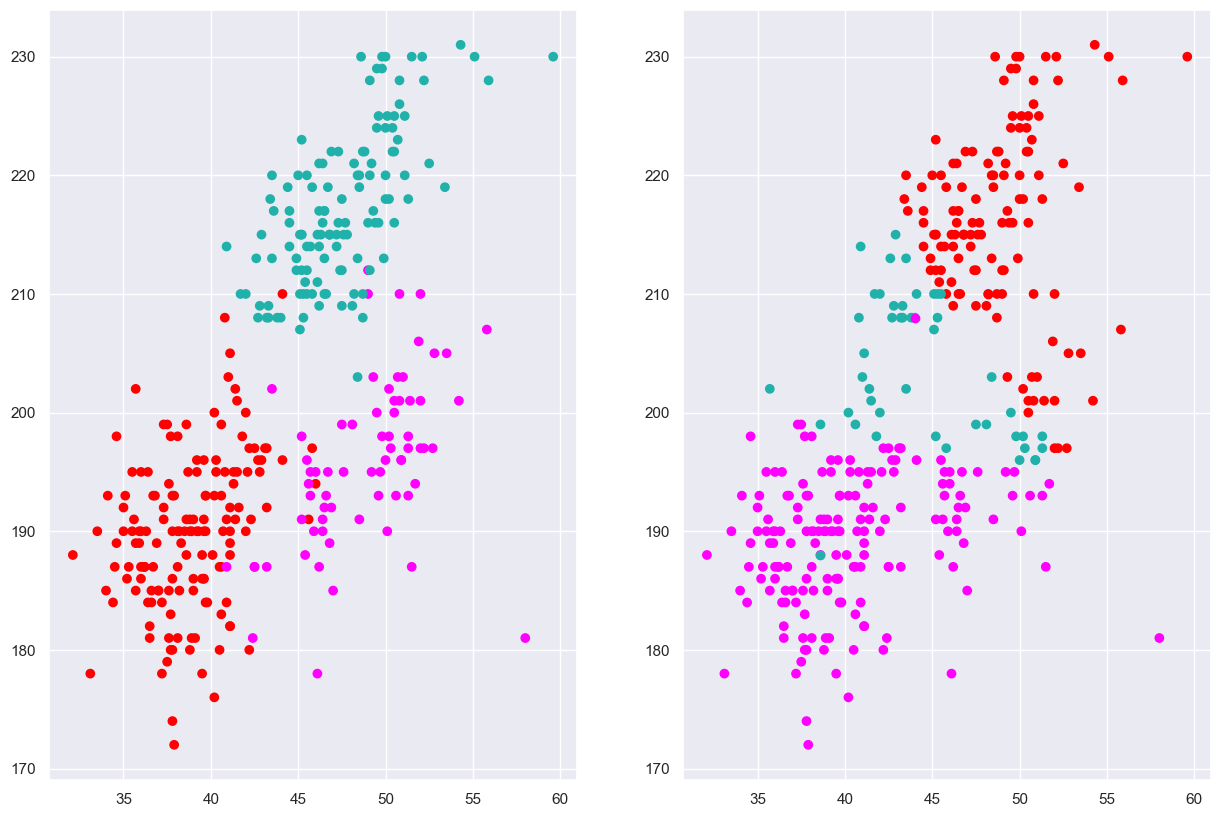

In [9]:
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][2])
ax2.scatter([centroids[1][0]], [centroids[1][1]], color = "lightseagreen", label = centroids[1][2])
ax2.scatter([centroids[2][0]], [centroids[2][1]], color = "magenta", label = centroids[2][2])

plt.show()

In [ ]:
def update_centers(X, centroids):
    """
    Updates the centroids of clusters by computing the mean of all points assigned to each cluster.

    This function re-calculates the positions of the centroids in a K-means clustering algorithm.
    For each cluster, it computes the mean of all points that have been assigned to it and returns 
    the new centroid positions.

    Parameters:
        X (array-like): The dataset with feature vectors, where each row represents a data point.
        centroids (list of tuples): The current positions of the centroids.

    Returns:
        list of tuples: The updated positions of the centroids after computing the mean of assigned points.
    """
    current_labels = assign_clusters(X, centroids)
    k = len(centroids)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

In [11]:
new_centers = update_centers(X, centroids)

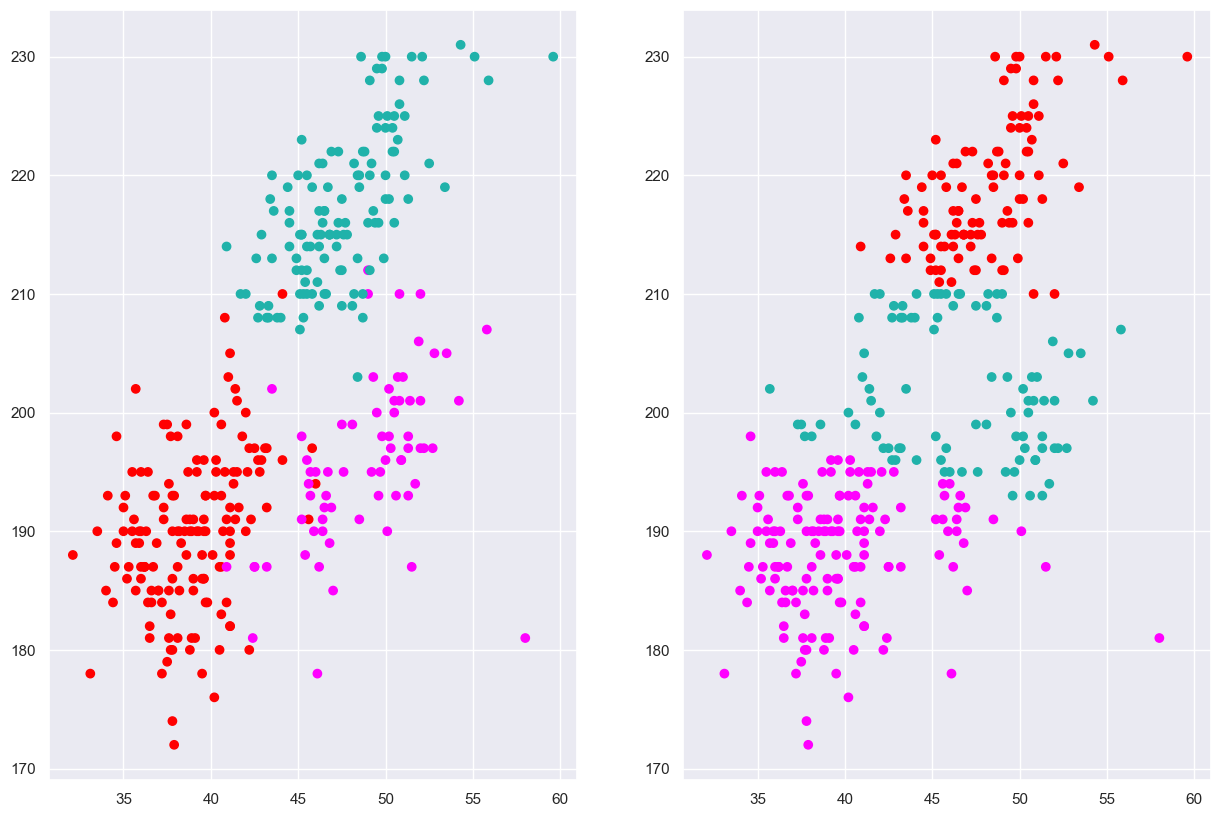

In [12]:
new_centers = update_centers(X, new_centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

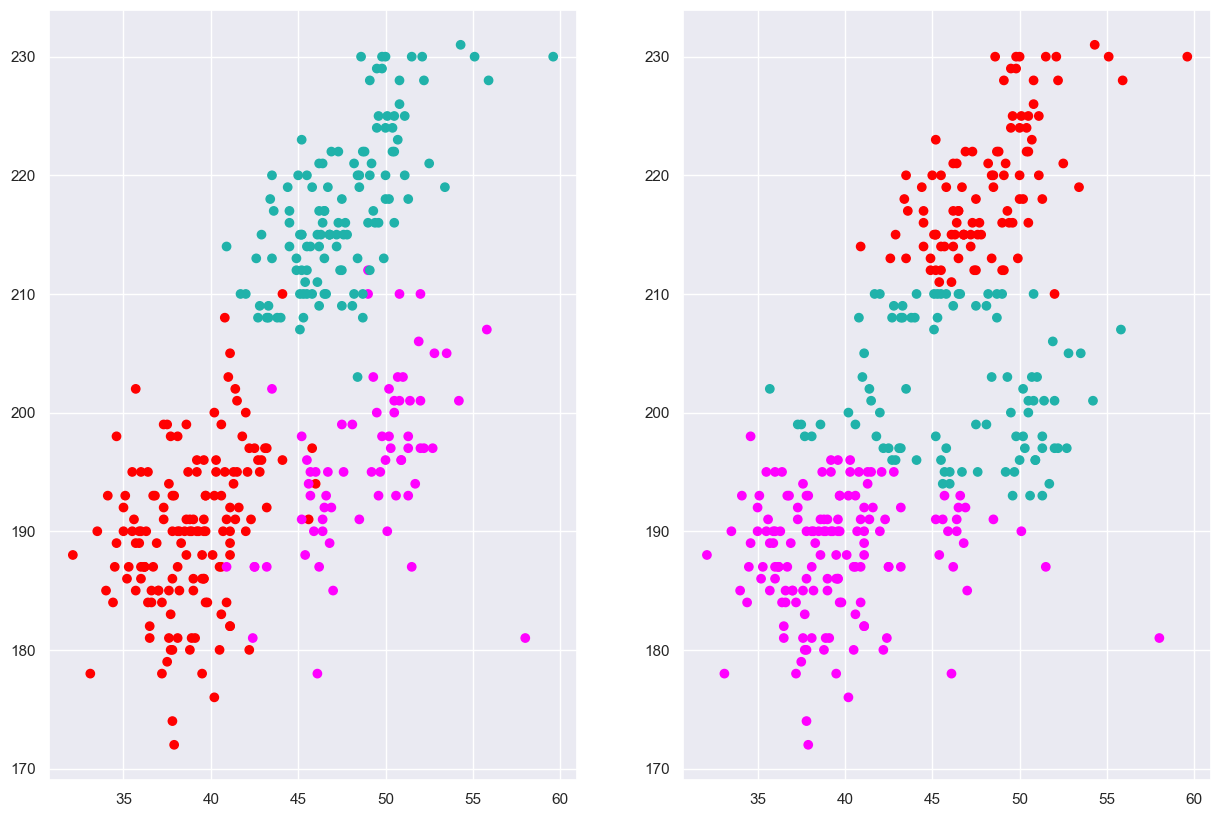

In [13]:
new_centers = update_centers(X, new_centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

In [ ]:
def k_means_clustering(X, k, max_iter = 100):
    """
    Performs K-means clustering on a given dataset to find k cluster centers.

    This function initializes k centroids randomly from the dataset, then iteratively
    updates the centroids based on the mean of the points assigned to each cluster.
    The process repeats for a maximum of `max_iter` iterations or until convergence.

    Parameters:
        X (array-like): The dataset with feature vectors, where each row is a data point.
        k (int): The number of clusters (centroids) to find.
        max_iter (int, optional): The maximum number of iterations for the clustering process (default is 100).

    Returns:
        list of tuples: The final positions of the k centroids after clustering.
    """
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers

In [15]:
centers = k_means_clustering(X, 3)

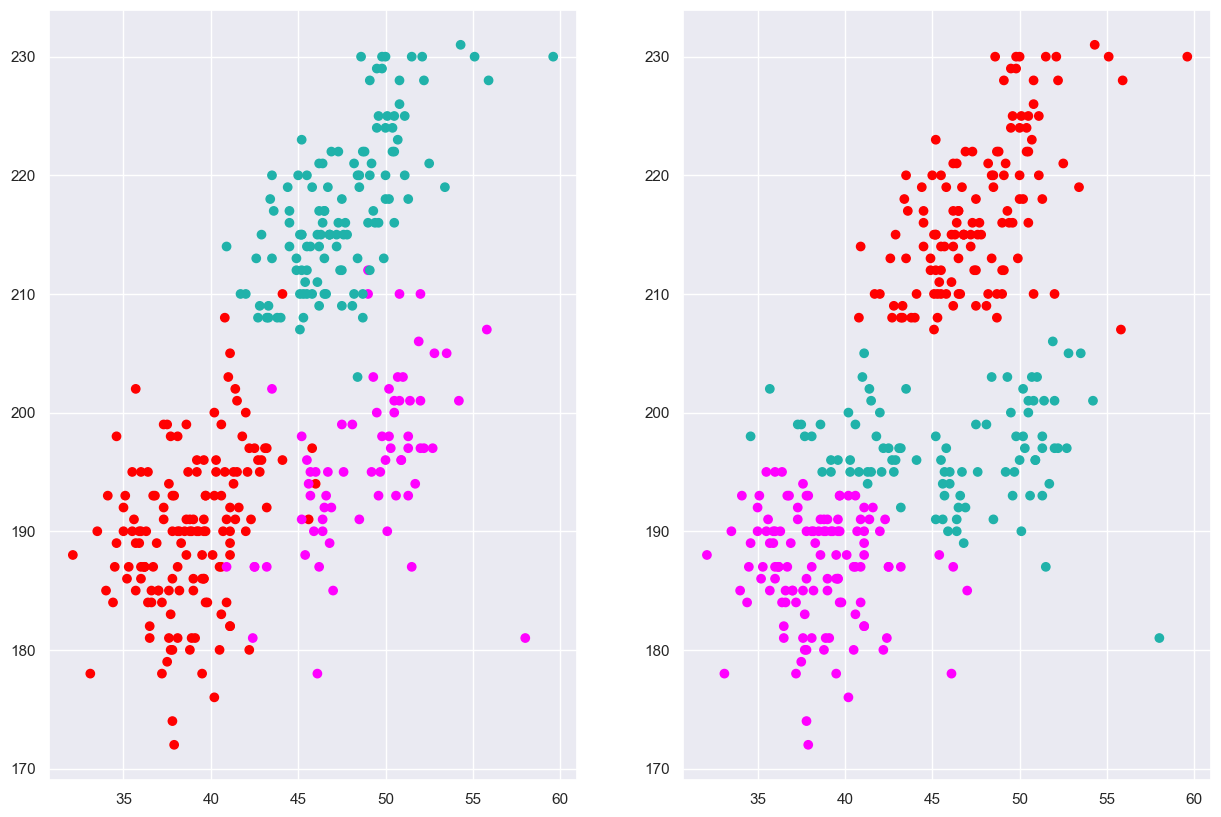

In [16]:
centers = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

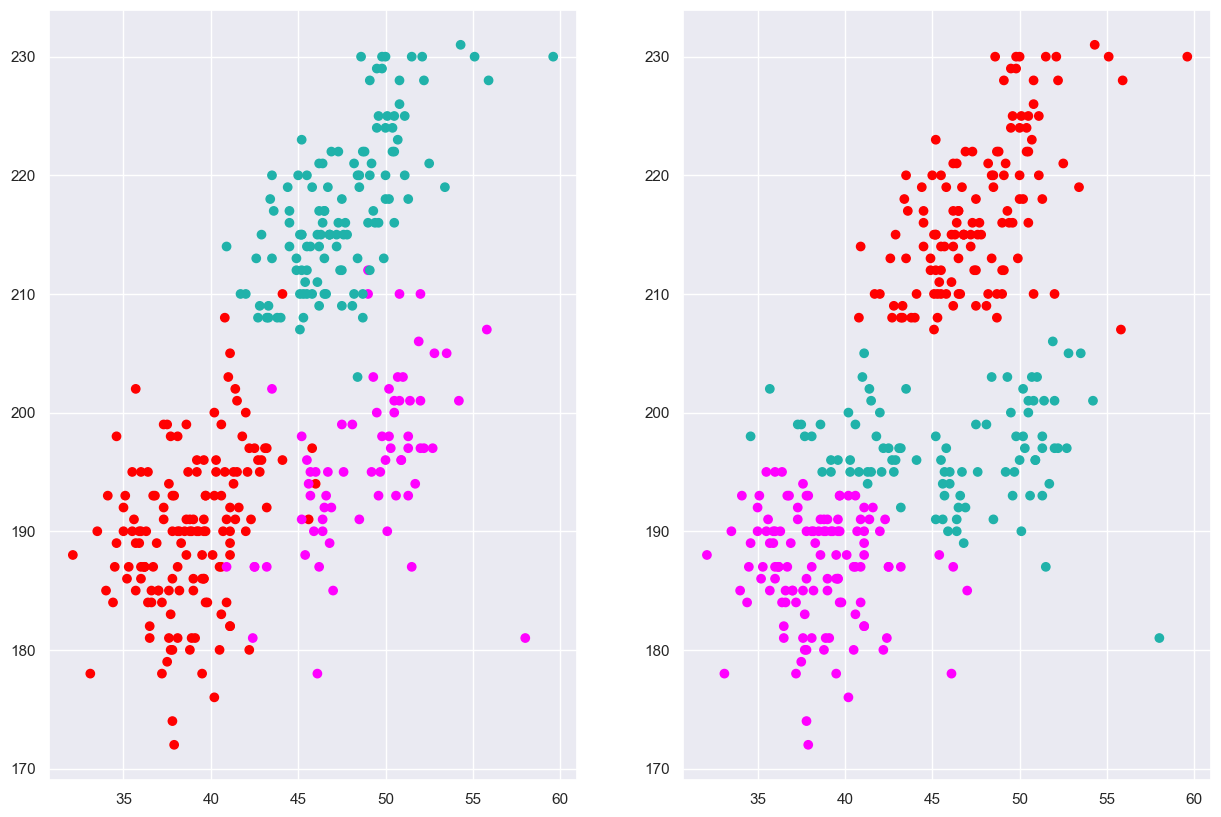

In [17]:
centers = k_means_clustering(X, 3, 500)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

Looking at it visually, I think $k$-means clustering is probably one of my worst performing algorithms. I think part of that might be due to the data as it's all pretty close together, so I could see how it could be incorrectly grouped. However, it's a little disappointing because I was really hoping that it would separate the lower left and lower right groups on graph, but it seems to have grouped mainly along the vertical axis not the horizontal axis.